# Cost of Living



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
costofliving1 = pd.read_csv('./Project_Data/costofliving.csv')
costofliving2 = pd.read_csv('./Project_Data/cost-of-living.csv')

In [3]:
# Basic Cost of Living graphs below!! ↓↓

In [4]:
#The Local Purchasing Power Index of each City -  Measures the relative purchasing power of a typical salary in that city, compared to New York City
df = px.data.tips()
fig = px.histogram(costofliving1, x = ('Cost of Living Plus Rent Index'), y = 'City',
                 color = 'Local Purchasing Power Index',
                 title = 'Cost of Living')

fig.show()

In [5]:
#How The Cost of Living Index corresponds to The Local Purchasing Power Index in each city - How much it cost to live a a certain are v.s. how much the average perosn makes there
df = px.data.tips()
fig = px.scatter(costofliving1, x = ('Cost of Living Plus Rent Index'), y = 'Local Purchasing Power Index',
                 color = 'City',
                 title = 'Cost of Living',
                 trendline = "ols" , trendline_scope="overall")

fig.show()

In [6]:
df = px.data.tips()
fig = px.box

In [7]:
fig = px.scatter(costofliving1, x='Cost of Living Index', y='Local Purchasing Power Index', trendline="lowess")

In [8]:
#costofliving 2 ↓↓

In [9]:
#everything below is for costofliving2 in order!

In [10]:
costofliving2 = pd.read_csv('./Project_Data/cost-of-living.csv')

In [11]:
costofliving2 = costofliving2.transpose() #swap rows and columns

In [12]:
costofliving2.columns = costofliving2.iloc[0] #assign row as column header

In [13]:
costofliving2.reset_index(inplace=True) #convert index to column

In [14]:
costofliving2.drop(0, axis=0, inplace=True) #delete row 0

In [15]:
costofliving2.rename(columns = {'index':'City'}, inplace = True) #renaming column header

In [16]:
costofliving2 = costofliving2.rename_axis(None, axis=1) #removing index header

In [17]:
costofliving2

,City,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
1,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
2,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
3,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
4,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
5,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.7,0.9,1.88,...,1.57,2.63,1.58,3.06,2.2,1.78,9.42,15221.84,1250.41,12874.09
157,"Perth, Australia",12.43,56.55,7.32,5.9,5.59,1.79,1.62,1.03,1.76,...,1.26,2.86,1.96,2.4,2.11,1.29,9.49,15239.2,1190.12,11526.08
158,"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.9,1.85,...,1.59,2.48,1.65,3.01,2.17,1.72,11.24,15066.62,1389.43,11933.55
159,"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,...,0.2,1.45,0.66,0.39,0.66,0.31,8.37,23071.86,55.41,2132.54


In [18]:
#everything below is for costofliving1 in order! ↓↓

In [19]:
costofliving1 = pd.read_csv('./Project_Data/costofliving.csv')

In [20]:
costofliving1 = costofliving1.drop(['Rank'],axis=1)

In [21]:
costofliving1

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
...,...,...,...,...,...,...,...
573,"Kanpur, India",20.79,3.60,12.73,22.19,13.31,38.83
574,"Karachi, Pakistan",20.75,4.84,13.29,18.48,15.21,29.16
575,"Rawalpindi, Pakistan",20.52,4.78,13.14,18.51,16.18,22.91
576,"Multan, Pakistan",18.68,2.94,11.30,18.37,11.80,25.09


In [22]:
#Final merged data set below! ↓↓

In [23]:
#merged set = 'merged_costofliving'

In [24]:
merged_costofliving = pd.merge(costofliving1, costofliving2, on= 'City') #merging data sets

In [25]:
merged_costofliving 

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79,23.12,92.46,12.94,...,2.58,4.66,2.52,3.79,2.89,2.69,46.09,21449.95,2194.64,28414.08
1,"Beirut, Lebanon",120.47,27.76,77.01,141.33,116.95,15.40,8.98,53.91,7.19,...,0.85,3.82,1.46,1.09,1.2,0.87,11.51,18766.59,348.27,4684.61
2,"Oslo, Norway",102.33,46.39,76.11,97.62,111.54,85.18,18.7,80.88,11.12,...,2.02,4.28,2.43,3.05,2.21,1.61,25.58,31245.91,319.19,10981.56
3,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,17.97,76.37,8.09,...,1.94,4.22,5.7,5.33,2.17,3.07,13.56,18118.42,2106.38,34441.93
4,"Reykjavik, Iceland",97.61,46.27,73.55,91.92,105.77,74.84,17.96,109.16,11.64,...,2.2,4.11,2.37,3.37,1.66,1.42,20.84,30138.76,245.58,6731.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,"Ankara, Turkey",27.17,6.31,17.39,21.43,17.97,39.07,3.82,15.28,3.51,...,0.53,1.7,1.26,0.79,1.78,0.51,9.24,20134.24,242.55,5303.45
152,"Hyderabad, India",26.61,6.47,17.17,29.69,18.17,51.21,1.9,8.86,3.8,...,0.57,1.17,0.65,0.44,0.57,0.33,4.16,21345.77,60.32,1715.91
153,"Chennai, India",26.08,6.76,17.02,28.88,16.98,46.31,1.52,7.59,3.35,...,0.36,1.3,0.67,0.41,0.78,0.45,4.17,21604.75,51.12,1470.3
154,"Ahmedabad, India",26.01,5.93,16.59,28.52,19.15,39.11,1.9,8.86,3.16,...,0.49,1.4,0.74,0.41,0.48,0.33,5.7,20809.53,51.34,1218.73


In [107]:
# Cost of living without the rent inclusion
df = px.data.gapminder()
fig = px.area(merged_costofliving, x="Cost of Living Index", y="City", color="Local Purchasing Power Index", line_group="Rent Index")
fig.show()

In [27]:
#cleaning the data -- dropping missing and duplicate values for sanity
merged_costofliving.dropna(inplace = True) # dropping missing values
merged_costofliving.drop_duplicates(inplace = True) # dropping duplicate values here
merged_costofliving = merged_costofliving.reset_index(drop=True) # resetting the index

length = len(merged_costofliving.index) #save length of array of later

<AxesSubplot:>

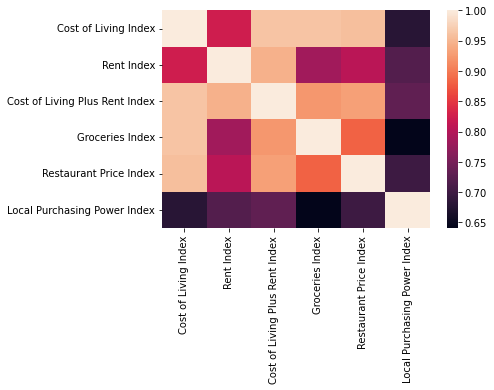

In [28]:
sns.heatmap(merged_costofliving.corr())

In [29]:
merged_costofliving.isnull().sum()

City                                                                   0
Cost of Living Index                                                   0
Rent Index                                                             0
Cost of Living Plus Rent Index                                         0
Groceries Index                                                        0
                                                                      ..
Onion (1kg)                                                            0
Beef Round (1kg) (or Equivalent Back Leg Red Meat)                     0
Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)               0
Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child    0
International Primary School, Yearly for 1 Child                       0
Length: 62, dtype: int64

In [30]:
print(merged_costofliving.shape)

(156, 62)


In [31]:
merged_costofliving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 62 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   City                                                                        156 non-null    object 
 1   Cost of Living Index                                                        156 non-null    float64
 2   Rent Index                                                                  156 non-null    float64
 3   Cost of Living Plus Rent Index                                              156 non-null    float64
 4   Groceries Index                                                             156 non-null    float64
 5   Restaurant Price Index                                                      156 non-null    float64
 6   Local Purchasing Power Index                      

In [32]:
#code to remove unnecessary columns
merged_costofliving_mod1 = merged_costofliving.drop(['Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)','Water (1.5 liter bottle)',
                                                     'Cigarettes 20 Pack (Marlboro)','Volkswagen Golf',
                                                     '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
                                                     'Cinema, International Release, 1 Seat','1 Pair of Jeans (Levis 501 Or Similar)',
                                                     '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
                                                     '1 Pair of Nike Running Shoes (Mid-Range)','1 Pair of Men Leather Business Shoes',
                                                     'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',
                                                     'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)', 'Apples (1kg)', 'Oranges (1kg)',
                                                     'Potato (1kg)', 'Lettuce (1 head)','Cappuccino (regular)', 'Rice (white), (1kg)', 'Tomato (1kg)',
                                                     'Banana (1kg)', 'Onion (1kg)','Beef Round (1kg) (or Equivalent Back Leg Red Meat)',
                                                    'Domestic Beer (0.5 liter draught)', 'Imported Beer (0.33 liter bottle)',
                                                     'Coke/Pepsi (0.33 liter bottle)', 'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)', 
                                                     'Local Cheese (1kg)', 'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
                                                     'Imported Beer (0.33 liter bottle)', 'Chicken Breasts (Boneless, Skinless), (1kg)',
                                                    'Tennis Court Rent (1 Hour on Weekend)'], axis = 'columns')

In [33]:
merged_costofliving_mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 28 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   City                                                                      156 non-null    object 
 1   Cost of Living Index                                                      156 non-null    float64
 2   Rent Index                                                                156 non-null    float64
 3   Cost of Living Plus Rent Index                                            156 non-null    float64
 4   Groceries Index                                                           156 non-null    float64
 5   Restaurant Price Index                                                    156 non-null    float64
 6   Local Purchasing Power Index                                      

In [34]:
merged_costofliving_mod1.columns

Index(['City', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'One-way Ticket (Local Transport)', 'Monthly Pass (Regular Price)',
       'Gasoline (1 liter)', 'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
       'Average Monthly Net Salary (Afte

In [35]:
#code to convert column objects into floats/numbers

merged_costofliving_mod1[['Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'One-way Ticket (Local Transport)', 'Monthly Pass (Regular Price)',
       'Gasoline (1 liter)', 'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
       'Average Monthly Net Salary (After Tax)', 'Taxi Start (Normal Tariff)',
       'Taxi 1km (Normal Tariff)', 'Taxi 1hour Waiting (Normal Tariff)',
       'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child']] = merged_costofliving_mod1[['Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'One-way Ticket (Local Transport)', 'Monthly Pass (Regular Price)',
       'Gasoline (1 liter)', 'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
       'Average Monthly Net Salary (After Tax)', 'Taxi Start (Normal Tariff)',
       'Taxi 1km (Normal Tariff)', 'Taxi 1hour Waiting (Normal Tariff)',
       'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child']].apply(pd.to_numeric)

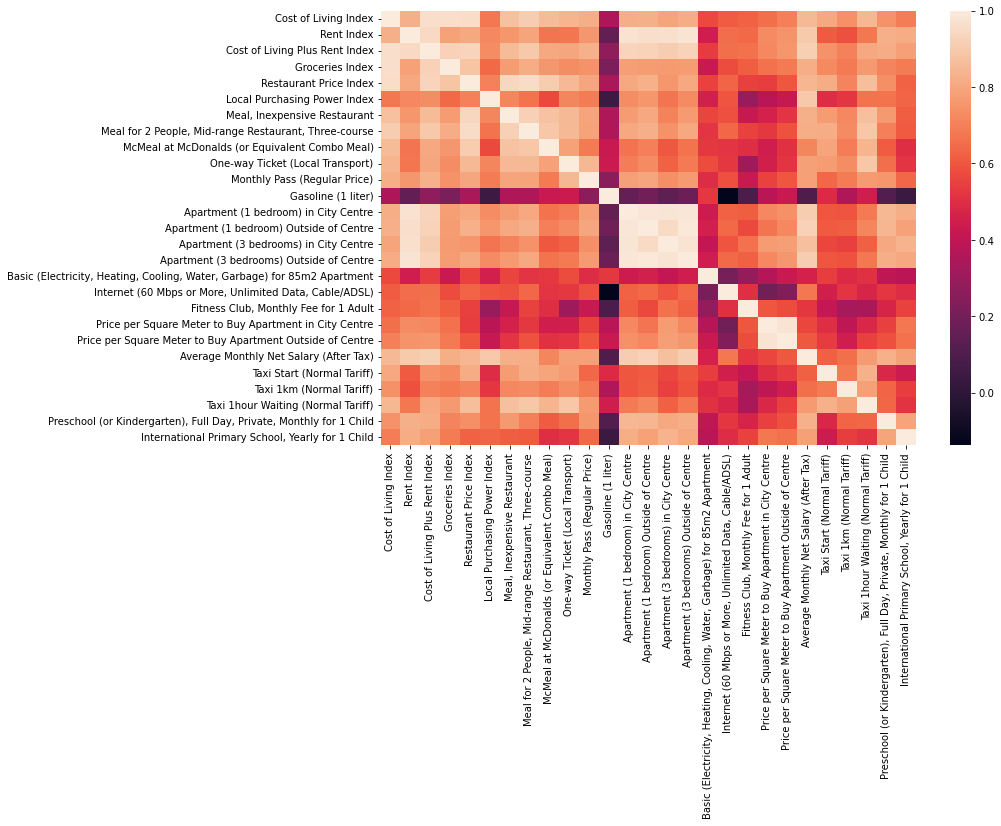

In [36]:
plt.figure(figsize = (12,8))
sns.heatmap(merged_costofliving_mod1.corr())
plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder = OneHotEncoder(handle_unknown= 'ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(merged_costofliving_mod1[['City']]).toarray(), columns=merged_costofliving_mod1[['City']].values)

In [39]:
encoder_df

,"(Zurich, Switzerland,)","(Beirut, Lebanon,)","(Oslo, Norway,)","(New York, NY, United States,)","(Reykjavik, Iceland,)","(Tel Aviv-Yafo, Israel,)","(San Francisco, CA, United States,)","(Seattle, WA, United States,)","(Copenhagen, Denmark,)","(Jerusalem, Israel,)",...,"(Izmir, Turkey,)","(Delhi, India,)","(Bangalore, India,)","(Bogota, Colombia,)","(Pune, India,)","(Ankara, Turkey,)","(Hyderabad, India,)","(Chennai, India,)","(Ahmedabad, India,)","(Kolkata, India,)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
final_df = pd.concat([merged_costofliving_mod1, encoder_df], axis='columns').drop("City", axis="columns")
final_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),One-way Ticket (Local Transport),...,"(Izmir, Turkey,)","(Delhi, India,)","(Bangalore, India,)","(Bogota, Colombia,)","(Pune, India,)","(Ankara, Turkey,)","(Hyderabad, India,)","(Chennai, India,)","(Ahmedabad, India,)","(Kolkata, India,)"
0,131.24,69.26,102.19,136.14,132.52,129.79,23.12,92.46,12.94,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120.47,27.76,77.01,141.33,116.95,15.40,8.98,53.91,7.19,1.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102.33,46.39,76.11,97.62,111.54,85.18,18.70,80.88,11.12,3.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.00,100.00,100.00,100.00,100.00,100.00,17.97,76.37,8.09,2.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97.61,46.27,73.55,91.92,105.77,74.84,17.96,109.16,11.64,3.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
## Code that Ritum creation (Gets rid of tuple headers)

columns = final_df.columns
columns_fixed = []

for i in range(len(columns)):
    if type(columns[i]) == str:
        columns_fixed.append(columns[i])
    else:
        columns_fixed.append(columns[i][0])
        
# columns_fixed

final_df = pd.DataFrame(final_df.values, columns = columns_fixed)
final_df

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),One-way Ticket (Local Transport),...,"Izmir, Turkey","Delhi, India","Bangalore, India","Bogota, Colombia","Pune, India","Ankara, Turkey","Hyderabad, India","Chennai, India","Ahmedabad, India","Kolkata, India"
0,131.24,69.26,102.19,136.14,132.52,129.79,23.12,92.46,12.94,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,120.47,27.76,77.01,141.33,116.95,15.40,8.98,53.91,7.19,1.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,102.33,46.39,76.11,97.62,111.54,85.18,18.70,80.88,11.12,3.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.00,100.00,100.00,100.00,100.00,100.00,17.97,76.37,8.09,2.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97.61,46.27,73.55,91.92,105.77,74.84,17.96,109.16,11.64,3.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,27.17,6.31,17.39,21.43,17.97,39.07,3.82,15.28,3.51,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,26.61,6.47,17.17,29.69,18.17,51.21,1.90,8.86,3.80,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,26.08,6.76,17.02,28.88,16.98,46.31,1.52,7.59,3.35,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,26.01,5.93,16.59,28.52,19.15,39.11,1.90,8.86,3.16,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#The x and y variables for the following models
x = final_df.drop('Cost of Living Index', axis= 'columns')
y = final_df['Cost of Living Index']

# David - Decision Tree

In [43]:
# import dataset
dataset = pd.read_csv('./Project_Data/costofliving.csv') 
# alternatively open up .csv file to read data
dataset = np.array(merged_costofliving)

In [44]:
print(dataset)

[['Zurich, Switzerland' 131.24 69.26 ... 21449.95 2194.64 28414.08]
 ['Beirut, Lebanon' 120.47 27.76 ... 18766.59 348.27 4684.61]
 ['Oslo, Norway' 102.33 46.39 ... 31245.91 319.19 10981.56]
 ...
 ['Chennai, India' 26.08 6.76 ... 21604.75 51.12 1470.3]
 ['Ahmedabad, India' 26.01 5.93 ... 20809.53 51.34 1218.73]
 ['Kolkata, India' 25.99 5.57 ... 19667.56 37.06 1126.1]]


In [45]:
# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int) 
  
# print X
print(len(X))

156


In [46]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = dataset[:, 2].astype(int) 
  
# print y
print(len(y))

156


In [47]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X,y)

DecisionTreeRegressor()

10600


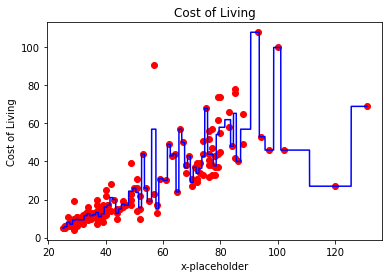

In [48]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)

print(len(X_grid))
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid)), 1)
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor_dt.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Cost of Living') 
  
# specify X axis label
plt.xlabel('x-placeholder')
  
# specify Y axis label
plt.ylabel('Cost of Living')
  
# show the plot
plt.show()

In [49]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor_dt, out_file ='tree.dot',
               feature_names =['Production Cost'])

#### Split-Fit-Predict-Evaluate

In [50]:
 # Splitting the dataset into train and test
X_train_Dav, X_test_Dav, y_train_Dav, y_test_Dav = train_test_split( 
x, y, test_size = 0.2, random_state = 100)

In [51]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train_Dav, y_train_Dav)

DecisionTreeRegressor(random_state=0)

In [52]:
# predicting a new value
  
# test the output by changing values
y_pred = regressor.predict(X_test_Dav)
  
# print the predicted price
print("Predicted Costofliving: ", y_pred) 

Predicted Costofliving:  [37. 43. 10. 55. 13. 17.  9. 31. 13. 33. 41. 14. 46. 56. 11. 22. 41. 27.
 31. 11. 56. 44. 16.  6. 39.  4.  6. 33. 41. 33. 14. 13.]


In [53]:
regressor.score(X_train_Dav, y_train_Dav)

1.0

In [54]:
regressor.score(X_test_Dav, y_test_Dav)

0.9814198867197563

In [103]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_test_Dav,y_pred )

4.71875

# Katherine (SVM/SVR)

In [57]:
#reading data set
x = final_df.drop('Cost of Living Index', axis= 'columns')
y = final_df['Cost of Living Index']

In [58]:
x

,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),One-way Ticket (Local Transport),Monthly Pass (Regular Price),...,"Izmir, Turkey","Delhi, India","Bangalore, India","Bogota, Colombia","Pune, India","Ankara, Turkey","Hyderabad, India","Chennai, India","Ahmedabad, India","Kolkata, India"
0,69.26,102.19,136.14,132.52,129.79,23.12,92.46,12.94,3.88,78.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,27.76,77.01,141.33,116.95,15.40,8.98,53.91,7.19,1.19,53.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.39,76.11,97.62,111.54,85.18,18.70,80.88,11.12,3.64,75.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.00,100.00,100.00,100.00,100.00,17.97,76.37,8.09,2.47,114.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.27,73.55,91.92,105.77,74.84,17.96,109.16,11.64,3.42,93.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,6.31,17.39,21.43,17.97,39.07,3.82,15.28,3.51,0.46,22.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,6.47,17.17,29.69,18.17,51.21,1.90,8.86,3.80,0.25,12.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,6.76,17.02,28.88,16.98,46.31,1.52,7.59,3.35,0.25,12.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,5.93,16.59,28.52,19.15,39.11,1.90,8.86,3.16,0.25,5.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y

0      131.24
1      120.47
2      102.33
3      100.00
4       97.61
        ...  
151     27.17
152     26.61
153     26.08
154     26.01
155     25.99
Name: Cost of Living Index, Length: 156, dtype: float64

In [60]:
#feature scaling
sc_x = StandardScaler()
scaled_x = sc_x.fit_transform(x)

In [61]:
x = pd.DataFrame(scaled_x, columns= x.columns)

In [62]:
x

,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),One-way Ticket (Local Transport),Monthly Pass (Regular Price),...,"Izmir, Turkey","Delhi, India","Bangalore, India","Bogota, Colombia","Pune, India","Ankara, Turkey","Hyderabad, India","Chennai, India","Ahmedabad, India","Kolkata, India"
0,1.988789,2.939186,3.788437,3.214150,1.917806,3.357815,2.987559,3.580709,2.601992,1.164445,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,12.449900
1,-0.017366,1.704198,4.017610,2.600580,-1.504892,0.208584,0.939310,0.740560,-0.071023,0.374606,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
2,0.883228,1.660057,2.087522,2.387388,0.583017,2.373402,2.372288,2.681740,2.363508,1.076116,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
3,3.474793,2.831775,2.192614,1.932629,1.026450,2.210818,2.132661,1.185105,1.200895,2.301200,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
4,0.877427,1.534498,1.835828,2.160008,0.273630,2.208591,3.874868,2.938588,2.144897,1.630412,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-1.054281,-1.219947,-1.276776,-1.299942,-0.796655,-0.940641,-1.113189,-1.077135,-0.796414,-0.617174,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
152,-1.046547,-1.230737,-0.912042,-1.292060,-0.433410,-1.368259,-1.454298,-0.933893,-1.005088,-0.966009,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
153,-1.032528,-1.238094,-0.947809,-1.338955,-0.580025,-1.452892,-1.521776,-1.156165,-1.005088,-0.945527,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322
154,-1.072651,-1.259184,-0.963706,-1.253441,-0.795458,-1.368259,-1.454298,-1.250014,-1.005088,-1.188751,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322


#### Split-Fit-Predict-Evaluate

In [63]:
#training (split data 80/20)
from sklearn.model_selection import train_test_split
x_train_Kath, x_test_Kath, y_train_Kath, y_test_Kath = train_test_split(x, y, test_size = 0.2)

In [64]:
print(x_train_Kath.shape)
print(x_test_Kath.shape)
print(y_train_Kath.shape)
print(y_test_Kath.shape)

(124, 182)
(32, 182)
(124,)
(32,)


In [65]:
#fitting data
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_Kath, y_train_Kath)

SVR()

In [66]:
#training
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=5)
regressor.fit(x_train_Kath, y_train_Kath)

SVR(C=5)

In [67]:
#predict
y_pred = regressor.predict(x_test_Kath)
y_pred
# y_pred = y.inverse_transform(y_pred)

array([41.97787   , 41.75201776, 67.76563488, 64.05296303, 69.75597596,
       51.71726689, 47.44075168, 42.37799887, 40.42868912, 46.56569427,
       40.34136576, 64.58565   , 38.65686307, 40.64110934, 49.80649028,
       62.00609751, 69.07186674, 69.97127989, 48.55290455, 42.00604405,
       39.78468289, 50.69771361, 39.31945656, 58.87096836, 41.45327915,
       69.85696145, 57.58891461, 64.25601107, 49.2243277 , 63.2747012 ,
       47.39906636, 43.60459499])

In [68]:
regressor.score(x_train_Kath, y_train_Kath)

0.780180315402676

In [69]:
#Accuracy Scores
regressor.score(x_test_Kath, y_test_Kath)

0.7320459164021591

In [70]:
mean_squared_error(y_test_Kath,y_pred )

117.1152028382671

In [102]:
svr_model1 = SVR(kernel='rbf', gamma='scale', tol=0.001, C=100)
## Kernel
## gamma
## tol
## C
svr_model1.fit(x_train_Kath, y_train_Kath)
print(svr_model1.score(x_train_Kath, y_train_Kath))
print(svr_model1.score(x_test_Kath, y_test_Kath))
print(mean_squared_error(y_test_Kath,y_pred ))

0.9999799773106288
0.9217180265305381
117.1152028382671


# Sophia (Random Forest)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
x= final_df.drop('Cost of Living Index', axis = 'columns')
y= final_df['Cost of Living Index']

#### Split-Fit-Predict-Evaluate

In [73]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(
x, y, test_size=0.2, random_state=123)

print ('Train group shape:', x_train_sm.shape)
print ('Test group shape:', x_test_sm.shape)

x_train_sm['Train_or_test'] = 1
x_test_sm['Train_or_test'] = 0 

random_forest = RandomForestRegressor(n_estimators=500, random_state=123)
random_forest.fit(x_train_sm, y_train_sm)

Train group shape: (124, 182)
Test group shape: (32, 182)


RandomForestRegressor(n_estimators=500, random_state=123)

In [74]:
random_forest.score(x_train_sm, y_train_sm)

0.9920101845259802

In [75]:
random_forest.score(x_test_sm, y_test_sm)

0.964555756899568

In [76]:
mean_squared_error(y_test_sm, random_forest.predict(x_test_sm))

15.700726826712621

In [77]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [101]:
random_forest_model7 = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state= 13)
random_forest_model7.fit(x_train_sm, y_train_sm)
print(random_forest_model7.score(x_train_sm, y_train_sm))
print(random_forest_model7.score(x_test_sm, y_test_sm))

0.9895121580560061
0.9745539111597259


# Amir - Lasso Regression

#### Split-Fit-Predict-Evaluate

In [78]:
x_train_ar, x_test_ar, y_train_ar, y_test_ar = train_test_split( x, y, 
                                      test_size=0.2, random_state=0)

In [79]:
x_train_ar

,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),One-way Ticket (Local Transport),Monthly Pass (Regular Price),...,"Izmir, Turkey","Delhi, India","Bangalore, India","Bogota, Colombia","Pune, India","Ankara, Turkey","Hyderabad, India","Chennai, India","Ahmedabad, India","Kolkata, India"
132,10.41,21.78,25.52,26.56,34.38,4.67,20.74,4.15,0.10,9.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,12.62,27.42,38.00,31.34,29.69,3.59,31.45,5.39,0.22,23.81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,62.39,71.24,63.64,83.31,81.82,15.00,60.00,8.00,3.00,125.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,17.47,33.51,46.14,43.16,42.86,6.29,42.47,6.29,0.63,42.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,13.88,27.78,30.10,34.51,36.05,5.39,24.62,5.09,0.76,27.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,40.36,64.78,74.46,101.01,79.55,15.56,62.24,12.97,1.53,55.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,14.13,27.47,41.08,24.67,64.04,2.87,16.60,3.32,0.55,22.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,44.47,49.48,57.06,42.55,53.00,4.56,26.04,4.56,0.52,26.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,12.21,25.30,38.66,19.21,30.67,1.94,15.52,3.88,0.27,7.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
lasso_model = Lasso(random_state=0)
lasso_model.fit(x_train_ar, y_train_ar)

/projects/d061bad1-2739-44d6-bf33-6fa5871e6830/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+01, tolerance: 6.172e+00



Lasso(random_state=0)

In [81]:
lasso_model.score(x_train_ar, y_train_ar)

0.9975346826067137

In [82]:
lasso_model.score(x_test_ar, y_test_ar)

0.9955682671655123

In [83]:
mean_squared_error(y_test_ar, lasso_model.predict(x_test_ar))

1.8248151158577925

plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

# Nne Ezi - Linear Regression

#### Split-Fit-Predict-Evaluate

In [85]:
x = final_df.drop('Cost of Living Index', axis=1)

In [86]:
final_df.columns

Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'One-way Ticket (Local Transport)',
       ...
       'Izmir, Turkey', 'Delhi, India', 'Bangalore, India', 'Bogota, Colombia',
       'Pune, India', 'Ankara, Turkey', 'Hyderabad, India', 'Chennai, India',
       'Ahmedabad, India', 'Kolkata, India'],
      dtype='object', length=183)

In [87]:
y = final_df['Cost of Living Index']

In [88]:
x_train_Nne, x_test_Nne, y_train_Nne, y_test_Nne = train_test_split( x, y, test_size=0.2 )

In [89]:
linr = LinearRegression()
linr.fit(x_train_Nne, y_train_Nne)
print(linr.intercept_, linr.coef_[0])

0.0681439386951439 -0.8654491939972432


In [90]:
y_hat = linr.predict(x_test_Nne)

In [91]:
linr.score(x_train_Nne, y_train_Nne)#also put y_train_Nne

1.0

In [92]:
#do the same but with x_test_Nne, y_test_Nne
linr.score(x_test_Nne, y_test_Nne)

0.9999971631144062

In [93]:
#now do mean_squared_error(y_test_sm, random_forest.predict(x_test_sm)) but with linr instead of random_forest and your variables
mean_squared_error(y_test_Nne, linr.predict(x_test_Nne))

0.0011233398942331447

In [94]:
#Table with models and scores
model_performance = []

In [95]:
dt_reg = DecisionTreeRegressor(criterion="squared_error",splitter='random', random_state=4)
dt_reg.fit(X_train_Dav, y_train_Dav)
model_performance.append({
        'model': 'Decision_Tree_Regression',
        'train_accuracy': dt_reg.score(X_train_Dav, y_train_Dav),
        'test_accuracy': dt_reg.score(X_test_Dav, y_test_Dav),
        'Mean_Sqr_Error': mean_squared_error(y_test_Dav, dt_reg.predict(X_test_Dav))
    })

In [96]:
sv_reg = SVR(kernel='rbf', C=5)
sv_reg.fit(x_train_Kath, y_train_Kath)
model_performance.append({
        'model': 'SVR',
        'train_accuracy': sv_reg.score(x_train_Kath, y_train_Kath),
        'test_accuracy': sv_reg.score(x_test_Kath, y_test_Kath),
        'Mean_Sqr_Error': mean_squared_error(y_test_Kath,y_pred )
    })

In [97]:
rf_reg = RandomForestRegressor(n_estimators=50, criterion='squared_error', random_state=4)
rf_reg.fit(x_train_sm, y_train_sm)
model_performance.append({
        'model': 'Random_Forest',
        'train_accuracy': rf_reg.score(x_train_sm, y_train_sm),
        'test_accuracy': rf_reg.score(x_test_sm, y_test_sm),
        'Mean_Sqr_Error': mean_squared_error(y_test_sm, rf_reg.predict(x_test_sm))
    })

In [98]:
l_reg = Lasso(random_state=4)
l_reg.fit(x_train_ar, y_train_ar)
model_performance.append({
        'model': 'Lasso',
        'train_accuracy': l_reg.score(x_train_ar, y_train_ar),
        'test_accuracy': l_reg.score(x_test_ar, y_test_ar),
        'Mean_Sqr_Error': mean_squared_error(y_test_ar, lasso_model.predict(x_test_ar))
    })

/projects/d061bad1-2739-44d6-bf33-6fa5871e6830/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+01, tolerance: 6.172e+00



In [99]:
linr_reg = LinearRegression()
linr_reg.fit(x_train_Nne, y_train_Nne)
model_performance.append({
        'model': 'Linear_Regression',
        'train_accuracy': linr_reg.score(x_train_Nne, y_train_Nne),
        'test_accuracy': linr_reg.score(x_test_Nne, y_test_Nne),
        'Mean_Sqr_Error': mean_squared_error(y_test_Nne, linr.predict(x_test_Nne))
    })

In [100]:
evaluation_df = pd.DataFrame(model_performance, columns=['model', 'train_accuracy', 'test_accuracy', 'Mean_Sqr_Error'])
evaluation_df

,model,train_accuracy,test_accuracy,Mean_Sqr_Error
0,Decision_Tree_Regression,1.000000,0.832656,42.500000
1,SVR,0.780180,0.732046,117.115203
2,Random_Forest,0.991175,0.965884,15.112181
3,Lasso,0.997535,0.995568,1.824815
4,Linear_Regression,1.000000,0.999997,0.001123
